In [1]:
import numpy as np

In [7]:
import os

len(os.listdir('../../Data/Sample/'))

11682

In [10]:
tin = np.load('../../Data/Sample/in.npy') ## Annotations


In [11]:
tout = np.load('../../Data/Sample/out.npy')

### in.npy  --> inner annotation
### out.npu --> outter annoatation

In [16]:
from PIL import Image,ImageDraw

In [41]:
def gen_mask(index):
    # image_draw = Image.open('../../Data/Sample/6.jpg')
    image_draw = Image.fromarray(np.zeros((480,480),dtype=np.uint8))
    draw = ImageDraw.Draw(image_draw)
    draw.polygon(tout[index],  outline=None, fill=255)
    draw.polygon(tin[index],  outline=None, fill=100 )

    image_draw.save('../../Data/In_mask/mask_%06d.jpg'%index)

In [42]:
for i in range(len(tin)):
    gen_mask(i)
    if i%1000==0:
        print('------%d-------'%i)

------0-------
------1000-------
------2000-------
------3000-------
------4000-------
------5000-------
------6000-------
------7000-------
------8000-------
------9000-------
------10000-------
------11000-------


In [47]:
import shutil
for i in range(0,len(tin)):
    shutil.move('../../Data/In_image/%06d.jpg'%(i+1),'../../Data/In_image/%06d.jpg'%i,)

In [5]:
import cv2

In [14]:
import cv2
import numpy as np
from PIL import Image

# source = cv2.imread('../../Data/Sample/In_mask/mask_000001.jpg', 0)
source = cv2.imread('../../Data/Sample/In_image/000001.jpg', 0)


#--- ensure image is of the type float ---
img = source.astype(np.float32)

#--- the following holds the square root of the sum of squares of the image dimensions ---
#--- this is done so that the entire width/height of the original image is used to express the complete circular range of the resulting polar image ---
value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))

polar_image = cv2.linearPolar(img,(img.shape[0]/2, img.shape[1]/2), value, cv2.WARP_FILL_OUTLIERS)

polar_image = polar_image.astype(np.uint8)
#cv2.imshow("Polar Image", polar_image)


In [11]:
polar_image.shape

(480, 480)

In [15]:
Image.fromarray(polar_image).save('Image_transform.jpg')

In [149]:
import os.path
import random
import torchvision.transforms as transforms
import torch
from base_dataset import BaseDataset, get_transform
from image_folder import make_dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

import PIL.ImageOps    


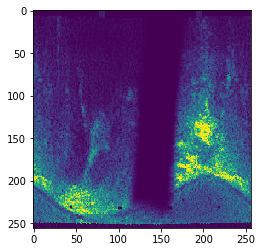

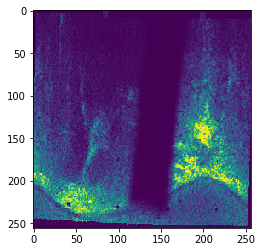

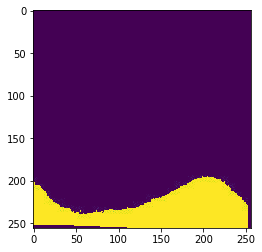

In [374]:
cood = '../../Data/coordinate/test_A/40730.jpg'
# coodB = '../../Data/coordinate/test_B/40730.jpg'
coodB = '../../Data/coordinate/test_B/40730.jpg'

# cood = '../../Data/Sample/test_A/010000.jpg'

A = Image.open(cood)
B = Image.open(coodB)
A = np.array(A)
B = np.array(B)


if(random.randint(0,4)!=40):

    w = random.randint(15,74)     #64
    h = random.randint(170,310)
    x = random.randint(6,316-h)
    y = random.randint(0,316-w)

#     image_draw = Image.open('./mask/' + str(random.randint(0,9)) + '.jpg').resize((w,h),Image.ANTIALIAS).convert('L')
    mask = PIL.ImageOps.invert(Image.open('./mask/' + str(random.randint(1,9)) + '.jpg').convert('L')).resize((w,h))
    img1 = np.asarray(mask)
    background = np.zeros((316,316))
    background[x:x+h,y:y+w] += img1
    mask = background[30:286,30:286]
    
    A = (A*(1-mask/255))
    A = A.astype(np.uint8)

zero = np.zeros((256,256), np.uint8)
C = np.dstack((A,zero))
C = np.dstack((C,B))
C = Image.fromarray(C)


# A = A.resize((256, 256), Image.BICUBIC)
# B = B.resize((256, 256), Image.BICUBIC)
# # A = transforms.RandomHorizontalFlip(0.5)(A)
# A = transforms.RandomRotation(15, resample=False, expand=False, center=None)(A)
C = transforms.RandomRotation(15, resample=False, expand=False, center=None)(C)

C = np.asarray(C)


plt.imshow(A)
plt.show()
plt.imshow(C[:,:,0])
plt.show()
plt.imshow(C[:,:,2])
# plt.imshow(B)
plt.show()


# A = transforms.ToTensor()(A)
# B = transforms.ToTensor()(B)
# A = transforms.Normalize((0.5,), (0.5,))(A)


In [368]:
C[:,:,0].shape

(256, 256)

In [324]:
masks= []

for i in range(1,10):
    masks.append(PIL.ImageOps.invert(Image.open('./mask/' + str(i) + '.jpg').convert('L')))

In [317]:

C = np.dstack((A,B))
C.astype(np.int32)
Image.fromarray(C)


TypeError: Cannot handle this data type

In [319]:
C.shape

(256, 256, 2)

In [138]:
A = Image.open(cood)

A = np.array(A)
C = np.dstack((A,B))
C.shape

(256, 256, 2)

In [125]:
A.size

(256, 256)

In [ ]:
if(random.randint(0,3)!=3):

    w = random.randint(15,64)     #64
    h = random.randint(80,260)
    x = random.randint(0,316-h)
    y = random.randint(0,316-w)

    image_draw = Image.open('./mask/' + str(random.randint(0,9)) + '.jpg').resize((w,h),Image.ANTIALIAS).convert('L')
    draw = ImageDraw.Draw(image_draw)
    # draw.ellipse((-10,-10,74,138),  outline="white", fill="white" )

    img1 = 255-copy.deepcopy(np.asarray(image_draw))
    background = np.zeros((316,316))
    background[x:x+h,y:y+w] += img1
    mask = background[30:286,30:286]
    plt.imshow(mask)
    plt.show()
    plt.imshow(Image.fromarray(long1[:,600:1400]).resize((256, 256)) * (255 - mask) //255)
    plt.show()

In [144]:
random.randint(0,1)

1

In [120]:
pilTrans = transforms.ToPILImage()
pilImg = pilTrans(A)
pilImgB = pilTrans(B)

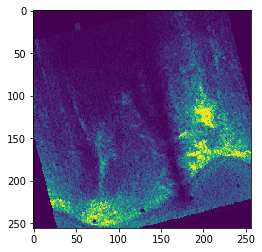

In [121]:
imgplot = plt.imshow(pilImg)

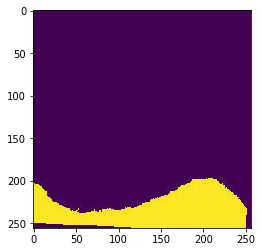

In [122]:
imgplot = plt.imshow(pilImgB)